# TWAS plot

In [1]:
suppressMessages({library(data.table)
                  library(dplyr)
                  library(ggplot2)
                  })

In [2]:
pgc2_file = '/ceph/projects/v4_phase3_paper/inputs/sz_gwas/pgc2_clozuk/map_phase3/_m/libd_hg38_pgc2sz_snps.tsv'
pgc2_df = fread(pgc2_file)

In [3]:
twas_dat = read.delim(paste0('/ceph/projects/v4_phase3_paper/analysis/twas/', 
                             'gene_weights/fusion_pgc2/summary_stats/_m/fusion_associations.txt'))
twas_dat = merge(twas_dat, pgc2_df, by.x='BEST.GWAS.ID', by.y='our_snp_id', suffixes=c('_TWAS', '_PGC3'))

twas_dat$group = 'Up'
twas_dat$group[twas_dat['TWAS.Z'] < 0] = "Down"

for(xx in seq_along(twas_dat$ID)){
    if(twas_dat$ID[xx] == ''){
        twas_dat$New_ID[xx] = as.character(twas_dat$FILE[xx])
    } else {
        twas_dat$New_ID[xx] = as.character(twas_dat$ID[xx])
    }
}

In [4]:
nCHR <- length(unique(twas_dat$CHR_TWAS))
twas_dat$BPcum <- NA

s <- 0
nbp <- c()
for (i in sort(unique(twas_dat$CHR_TWAS))){
    nbp[i] <- max(twas_dat[twas_dat$CHR_TWAS == i,]$hg38pos)
    twas_dat[twas_dat$CHR_TWAS == i,"BPcum"] <- twas_dat[twas_dat$CHR_TWAS == i,"hg38pos"] + s
    s <- s + nbp[i]
}

In [5]:
axis.set <- twas_dat %>% 
  group_by(CHR_TWAS) %>% 
  summarize(center = (max(BPcum) + min(BPcum)) / 2)

#axis.set

### All TWAS, Caudate

In [6]:
df = twas_dat[twas_dat$Bonferroni < 0.05, ]
df = head(df[order(df$Bonferroni), ], 10)
df

,BEST.GWAS.ID,FILE,ID,CHR_TWAS,P0,P1,HSQ,BEST.GWAS.Z,EQTL.ID,EQTL.R2,⋯,P,hg19chrc,hg38chrc,hg38pos,pgc2_a1_same_as_our_counted,rsid,is_index_snp,group,New_ID,BPcum
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<int>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<dbl>
6842,chr6:28744470:A:G,ENSG00000158691,ZSCAN12,6,28378955,28399734,0.070262,-13.927,chr6:28744886:A:G,-0.001513763,⋯,4.32e-44,chr6,chr6,28744470,FALSE,rs1233578,FALSE,Down,ZSCAN12,1087287753
6831,chr6:28426903:C:T,ENSG00000219891,ZSCAN12P1,6,28091154,28093664,0.266109,-13.512,chr6:27883095:G:A,0.082585835,⋯,1.32e-41,chr6,chr6,28426903,FALSE,rs13201681,FALSE,Up,ZSCAN12P1,1086970186
6912,chr6:31793436:G:A,ENSG00000244731,C4A,6,31982024,32002681,0.273917,-11.705,chr6:31973120:A:G,0.213175555,⋯,1.20e-31,chr6,chr6,31793436,FALSE,rs2607014,FALSE,Up,C4A,1090336719
6913,chr6:31793436:G:A,ENSG00000204338,CYP21A1P,6,32005636,32008451,0.250394,-11.705,chr6:31973120:A:G,0.110661388,⋯,1.20e-31,chr6,chr6,31793436,FALSE,rs2607014,FALSE,Up,CYP21A1P,1090336719
6876,chr6:30762705:G:T,ENSG00000280128,ENSG00000280128,6,30282349,30286054,0.493324,-11.432,chr6:29844099:A:G,0.062030657,⋯,2.91e-30,chr6,chr6,30762705,FALSE,rs9262174,FALSE,Down,ENSG00000280128,1089305988
6921,chr6:32231204:C:T,ENSG00000228962,HCG23,6,32390510,32393686,0.696882,-11.674,chr6:32371571:C:T,0.246425116,⋯,1.74e-31,chr6,chr6,32231204,FALSE,rs3130297,FALSE,Down,HCG23,1090774487
6905,chr6:31348749:T:C,ENSG00000213722,DDAH2,6,31727038,31730617,0.075104,-11.911,chr6:31729781:G:A,-0.001196441,⋯,1.04e-32,chr6,chr6,31348749,FALSE,rs9265994,FALSE,Up,DDAH2,1089892032
6853,chr6:29445226:C:T,ENSG00000235963,MCCD1P1,6,29907783,29908645,0.469257,-12.888,chr6:29850161:G:A,0.124176509,⋯,5.29e-38,chr6,chr6,29445226,FALSE,rs2023463,FALSE,Down,MCCD1P1,1087988509
6861,chr6:29591461:T:C,ENSG00000066379,ZNRD1,6,30058899,30064909,0.104252,-12.623,chr6:29757232:G:A,0.009756952,⋯,1.57e-36,chr6,chr6,29591461,FALSE,rs1233385,FALSE,Up,ZNRD1,1088134744


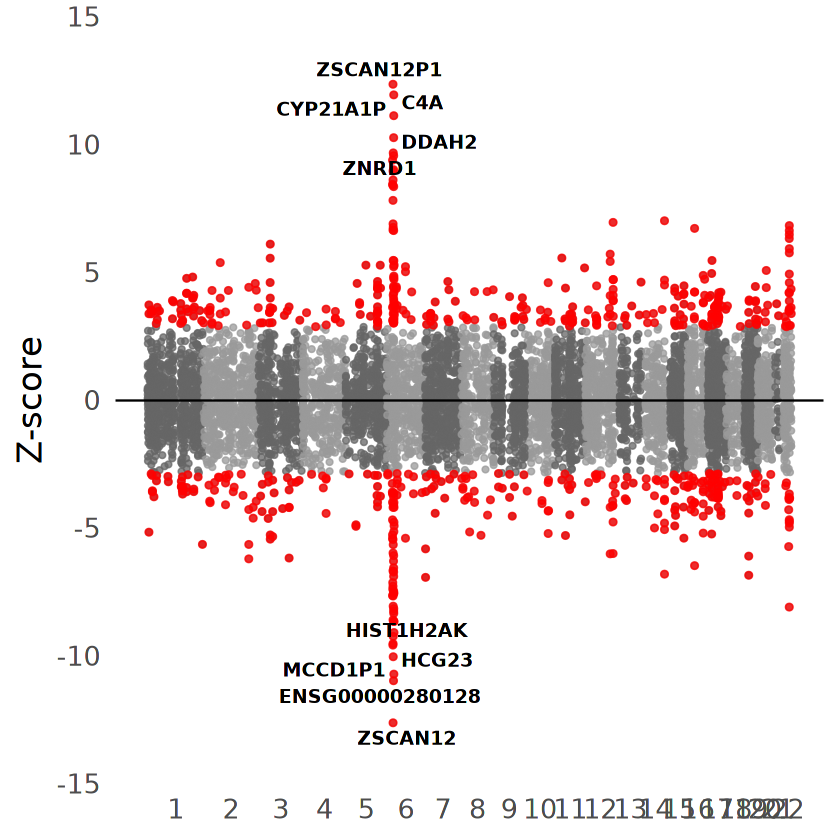

In [7]:
manhplot1 <- (ggplot(twas_dat, aes(x=BPcum, y=TWAS.Z)) + 
              geom_point(aes(color=as.factor(CHR_TWAS)), alpha=0.75, size=1.25) +
              geom_point(data=twas_dat[twas_dat$FDR < 0.05, ], color="red", alpha=0.75) +
              scale_color_manual(values = rep(c("grey40","grey60"), nCHR)) + 
              scale_x_continuous(label = axis.set$CHR_TWAS, breaks = axis.set$center) + 
              scale_y_continuous(expand = c(0,0), limits = c(-15, 15)) + labs(x = NULL, y = "Z-score") + 
              geom_hline(yintercept = 0, color = "black", linetype = "solid") + 
              ggrepel::geom_text_repel(data=df, fontface = "bold", #hjust=1, vjust=1,
                                       #position=position_jitter(width=1, height=1), 
                                       aes(x=BPcum, y=TWAS.Z, label=New_ID)) +
              theme_minimal(base_size=20) + 
              theme(legend.position="none", panel.border=element_blank(), 
                    panel.grid.major=element_blank(), panel.grid.minor=element_blank())
            )
manhplot1

### Overlapping tissue

In [8]:
overlapping = read.delim(paste0('../../_m/overlapping_tissue_twasList.txt'))
overlapping = subset(overlapping, select=c('our_snp_id', 'FILE', 'ID', 'CHR_TWAS', 'BEST.GWAS.ID', 'P', 'TWAS.Z', 'TWAS.P', 'FDR'))
overlapping = overlapping[order(overlapping$FDR), ]
merge(head(overlapping['FILE'], 10), twas_dat, by='FILE')

FILE,BEST.GWAS.ID,ID,CHR_TWAS,P0,P1,HSQ,BEST.GWAS.Z,EQTL.ID,EQTL.R2,⋯,P,hg19chrc,hg38chrc,hg38pos,pgc2_a1_same_as_our_counted,rsid,is_index_snp,group,New_ID,BPcum
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<int>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<dbl>
ENSG00000122687,chr7:1981360:G:A,MRM2,7,2234231,2242198,0.181530,-8.823,chr7:2239847:A:C,0.089690285,⋯,1.11e-18,chr7,chr7,1981360,FALSE,rs12668848,FALSE,Down,MRM2,1231135025
ENSG00000129933,chr19:19457850:T:C,MAU2,19,19320681,19358755,0.074839,6.854,chr19:19357128:T:C,0.006471614,⋯,7.17e-12,chr19,chr19,19457850,FALSE,rs4808203,FALSE,Down,MAU2,2661684285
ENSG00000130921,chr12:123148383:G:A,C12orf65,12,123232916,123257959,0.220892,-7.933,chr12:123084072:A:C,0.016595478,⋯,2.14e-15,chr12,chr12,123148383,FALSE,rs1727302,FALSE,Up,C12orf65,2061204394
ENSG00000163016,chr2:73404084:G:A,ALMS1P1,2,73644919,73685576,0.343108,5.977,chr2:73546564:A:G,0.269048817,⋯,2.27e-09,chr2,chr2,73404084,FALSE,rs11899740,FALSE,Up,ALMS1P1,322277575
ENSG00000163634,chr3:63881679:A:G,THOC7,3,63833870,63863903,0.352469,-6.417,chr3:63856266:T:C,0.079975023,⋯,1.39e-10,chr3,chr3,63881679,FALSE,rs704373,TRUE,Down,THOC7,554424739
ENSG00000169592,chr16:29971798:G:T,INO80E,16,29995294,30005793,0.130354,-7.035,chr16:29989009:T:G,0.093542381,⋯,1.99e-12,chr16,chr16,29971798,FALSE,rs9932196,FALSE,Up,INO80E,2421980977
ENSG00000198951,chr22:42207808:C:T,NAGA,22,42058354,42070842,0.197868,7.641,chr22:42091896:G:A,0.185791039,⋯,2.15e-14,chr22,chr22,42207808,FALSE,rs6002655,TRUE,Up,NAGA,2841291599
ENSG00000226124,chr2:199850665:T:G,FTCDNL1,2,199760544,199851173,0.427987,-8.422,chr2:199984173:G:A,0.150663078,⋯,3.69e-17,chr2,chr2,199850665,FALSE,rs2949006,TRUE,Down,FTCDNL1,448724156
ENSG00000243696,chr3:53141001:G:A,ENSG00000243696,3,52813282,52835729,0.208179,-6.992,chr3:52840272:T:C,0.183716753,⋯,2.71e-12,chr3,chr3,53141001,FALSE,rs1080500,TRUE,Down,ENSG00000243696,543684061


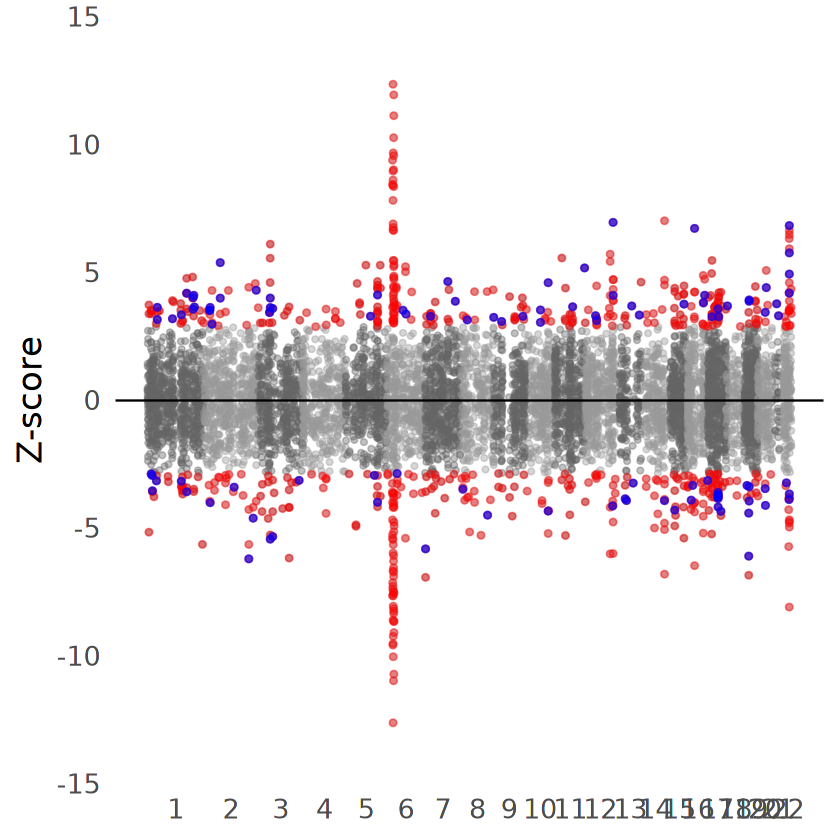

In [9]:
df = merge(overlapping['FILE'], twas_dat, by='FILE')
df = df[order(df$FDR), ]

manhplot2 <- (ggplot(twas_dat, aes(x=BPcum, y=TWAS.Z)) + 
              geom_point(aes(color=as.factor(CHR_TWAS)), alpha=0.4, size=1.25) +
              geom_point(data=twas_dat[twas_dat$FDR < 0.05, ], color="red", alpha=0.4) +
              geom_point(data=df, color="blue", alpha=0.6) +
              scale_color_manual(values = rep(c("grey40","grey60"), nCHR)) + 
              scale_x_continuous(label = axis.set$CHR_TWAS, breaks = axis.set$center) + 
              scale_y_continuous(expand = c(0,0), limits = c(-15, 15)) + labs(x = NULL, y = "Z-score") + 
              geom_hline(yintercept = 0, color = "black", linetype = "solid") + 
              #geom_text(data=head(df, 10), fontface = "bold", #hjust=1, vjust=1,
                        #position=position_jitter(width=1, height=1), 
              #          aes(x=BPcum, y=TWAS.Z, label=New_ID)) +
              theme_minimal(base_size=20) + 
              theme(legend.position="none", panel.border=element_blank(), 
                    panel.grid.major=element_blank(),panel.grid.minor=element_blank())
            )
manhplot2

In [10]:
save_plots <- function(p, fn){
    for(ext in c('.png', '.pdf', '.svg')){
        ggsave(paste0(fn,ext), p, width=30, height=15, units="cm")
    }
}

### Save plots

In [11]:
save_plots(manhplot1, 'caudateOnly_twas_manhattanplot')
save_plots(manhplot2, 'twas_manhattanplot')

### TWAS in GWAS loci, caudate

In [12]:
df = twas_dat[twas_dat$Bonferroni < 0.05 & twas_dat$P<5e-8, ]
df = head(df[order(df$FDR), ], 10)
df

,BEST.GWAS.ID,FILE,ID,CHR_TWAS,P0,P1,HSQ,BEST.GWAS.Z,EQTL.ID,EQTL.R2,⋯,P,hg19chrc,hg38chrc,hg38pos,pgc2_a1_same_as_our_counted,rsid,is_index_snp,group,New_ID,BPcum
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<int>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<dbl>
6842,chr6:28744470:A:G,ENSG00000158691,ZSCAN12,6,28378955,28399734,0.070262,-13.927,chr6:28744886:A:G,-0.001513763,⋯,4.32e-44,chr6,chr6,28744470,FALSE,rs1233578,FALSE,Down,ZSCAN12,1087287753
6831,chr6:28426903:C:T,ENSG00000219891,ZSCAN12P1,6,28091154,28093664,0.266109,-13.512,chr6:27883095:G:A,0.082585835,⋯,1.32e-41,chr6,chr6,28426903,FALSE,rs13201681,FALSE,Up,ZSCAN12P1,1086970186
6912,chr6:31793436:G:A,ENSG00000244731,C4A,6,31982024,32002681,0.273917,-11.705,chr6:31973120:A:G,0.213175555,⋯,1.20e-31,chr6,chr6,31793436,FALSE,rs2607014,FALSE,Up,C4A,1090336719
6913,chr6:31793436:G:A,ENSG00000204338,CYP21A1P,6,32005636,32008451,0.250394,-11.705,chr6:31973120:A:G,0.110661388,⋯,1.20e-31,chr6,chr6,31793436,FALSE,rs2607014,FALSE,Up,CYP21A1P,1090336719
6876,chr6:30762705:G:T,ENSG00000280128,ENSG00000280128,6,30282349,30286054,0.493324,-11.432,chr6:29844099:A:G,0.062030657,⋯,2.91e-30,chr6,chr6,30762705,FALSE,rs9262174,FALSE,Down,ENSG00000280128,1089305988
6921,chr6:32231204:C:T,ENSG00000228962,HCG23,6,32390510,32393686,0.696882,-11.674,chr6:32371571:C:T,0.246425116,⋯,1.74e-31,chr6,chr6,32231204,FALSE,rs3130297,FALSE,Down,HCG23,1090774487
6905,chr6:31348749:T:C,ENSG00000213722,DDAH2,6,31727038,31730617,0.075104,-11.911,chr6:31729781:G:A,-0.001196441,⋯,1.04e-32,chr6,chr6,31348749,FALSE,rs9265994,FALSE,Up,DDAH2,1089892032
6853,chr6:29445226:C:T,ENSG00000235963,MCCD1P1,6,29907783,29908645,0.469257,-12.888,chr6:29850161:G:A,0.124176509,⋯,5.29e-38,chr6,chr6,29445226,FALSE,rs2023463,FALSE,Down,MCCD1P1,1087988509
6861,chr6:29591461:T:C,ENSG00000066379,ZNRD1,6,30058899,30064909,0.104252,-12.623,chr6:29757232:G:A,0.009756952,⋯,1.57e-36,chr6,chr6,29591461,FALSE,rs1233385,FALSE,Up,ZNRD1,1088134744


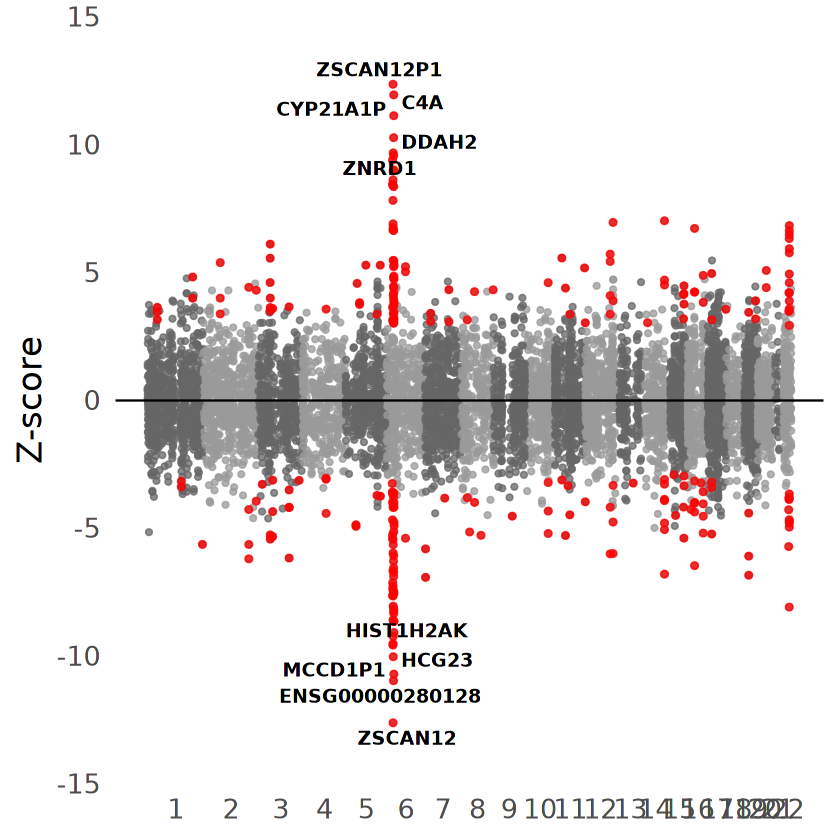

In [13]:
manhplot1 <- (ggplot(twas_dat, aes(x=BPcum, y=TWAS.Z)) + 
              geom_point(aes(color=as.factor(CHR_TWAS)), alpha=0.75, size=1.25) +
              geom_point(data=twas_dat[twas_dat$FDR < 0.05 & twas_dat$P<5e-8, ], color="red", alpha=0.75) +
              scale_color_manual(values = rep(c("grey40","grey60"), nCHR)) + 
              scale_x_continuous(label = axis.set$CHR_TWAS, breaks = axis.set$center) + 
              scale_y_continuous(expand = c(0,0), limits = c(-15, 15)) + labs(x = NULL, y = "Z-score") + 
              geom_hline(yintercept = 0, color = "black", linetype = "solid") + 
              ggrepel::geom_text_repel(data=df, fontface = "bold", #hjust=1, vjust=1,
                                       #position=position_jitter(width=1, height=1), 
                                       aes(x=BPcum, y=TWAS.Z, label=New_ID)) +
              theme_minimal(base_size=20) + 
              theme(legend.position="none", panel.border=element_blank(), 
                    panel.grid.major=element_blank(),panel.grid.minor=element_blank())
            )
manhplot1

### Overlapping tissue in significant GWAS loci

In [14]:
overlapping = read.delim('../../_m/overlapping_tissue_twasList.txt')
overlapping = subset(overlapping, P>5e-8, select=c('our_snp_id', 'FILE', 'ID', 'CHR_TWAS', 
                                                   'BEST.GWAS.ID', 'P', 'TWAS.Z', 'TWAS.P', 'FDR'))
overlapping = overlapping[order(overlapping$FDR), ]
merge(head(overlapping['FILE'], 10), twas_dat, by='FILE')

FILE,BEST.GWAS.ID,ID,CHR_TWAS,P0,P1,HSQ,BEST.GWAS.Z,EQTL.ID,EQTL.R2,⋯,P,hg19chrc,hg38chrc,hg38pos,pgc2_a1_same_as_our_counted,rsid,is_index_snp,group,New_ID,BPcum
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<int>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<dbl>
ENSG00000088298,chr20:35145275:T:C,EDEM2,20,35115357,35147364,0.263735,4.060,chr20:35149011:G:T,0.14123119,⋯,4.91e-05,chr20,chr20,35145275,FALSE,rs6060266,FALSE,Down,EDEM2,2735638116
ENSG00000108384,chr17:58681018:A:G,RAD51C,17,58692573,58735611,0.044826,4.717,chr17:58681018:A:G,0.01013211,⋯,2.39e-06,chr17,chr17,58681018,FALSE,rs12951104,FALSE,Down,RAD51C,2538447172
ENSG00000113141,chr5:140841554:G:A,IK,5,140647058,140662479,0.069588,-4.920,chr5:140649189:T:C,0.01261719,⋯,8.66e-07,chr5,chr5,140841554,FALSE,rs3756331,FALSE,Up,IK,1018565790
ENSG00000115649,chr2:219196879:T:C,CNPPD1,2,219171897,219178106,0.328898,-4.516,chr2:219180313:G:A,0.15563144,⋯,6.30e-06,chr2,chr2,219196879,FALSE,rs6707588,FALSE,Down,CNPPD1,468070370
ENSG00000117593,chr1:173743105:T:C,DARS2,1,173824503,173858546,0.200072,-5.024,chr1:173720304:C:T,0.16459546,⋯,5.05e-07,chr1,chr1,173743105,FALSE,rs76265477,FALSE,Up,DARS2,173743105
ENSG00000140265,chr15:43782086:A:G,ZSCAN29,15,43358172,43371025,0.434624,4.689,chr15:43384406:G:A,0.21440361,⋯,2.75e-06,chr15,chr15,43782086,FALSE,rs8034451,FALSE,Down,ZSCAN29,2334194168
ENSG00000146830,chr7:100717894:A:G,GIGYF1,7,100679507,100689448,0.166097,-5.351,chr7:100629565:A:C,0.05730451,⋯,8.74e-08,chr7,chr7,100717894,FALSE,rs1734907,FALSE,Up,GIGYF1,1329871559
ENSG00000157837,chr12:121244248:T:C,SPPL3,12,120762510,120904371,0.156866,-4.886,chr12:120910846:T:C,0.17006201,⋯,1.03e-06,chr12,chr12,121244248,FALSE,rs2686340,FALSE,Down,SPPL3,2059300259
ENSG00000164758,chr8:117545237:G:A,MED30,8,117520713,117540262,0.191607,-5.311,chr8:117487429:A:C,0.06556531,⋯,1.09e-07,chr8,chr8,117545237,FALSE,rs17668001,FALSE,Down,MED30,1505652511


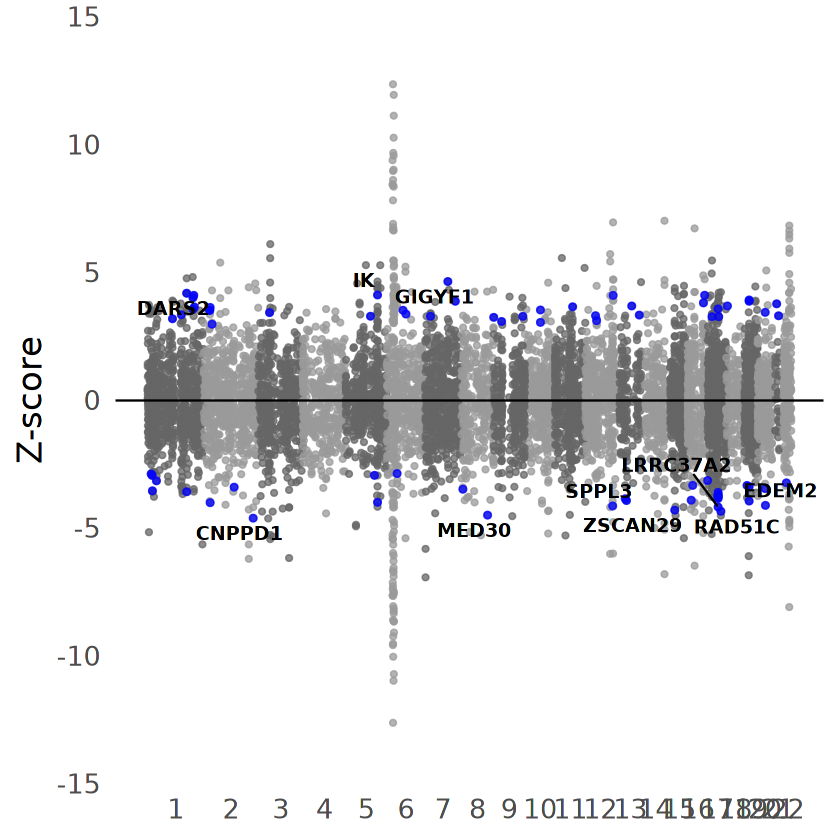

In [15]:
df = merge(overlapping['FILE'], twas_dat, by='FILE')
df = df[order(df$FDR), ]

manhplot2 <- (ggplot(twas_dat, aes(x=BPcum, y=TWAS.Z)) + 
              geom_point(aes(color=as.factor(CHR_TWAS)), alpha=0.75, size=1.25) +
              #geom_point(data=twas_dat[twas_dat$FDR < 0.05 & twas_dat$P<5e-8, ], color="red", alpha=0.75) +
              geom_point(data=df, color="blue", alpha=0.75) +
              scale_color_manual(values = rep(c("grey40","grey60"), nCHR)) + 
              scale_x_continuous(label = axis.set$CHR_TWAS, breaks = axis.set$center) + 
              scale_y_continuous(expand = c(0,0), limits = c(-15, 15)) + labs(x = NULL, y = "Z-score") + 
              geom_hline(yintercept = 0, color = "black", linetype = "solid") + 
              ggrepel::geom_text_repel(data=head(df, 10), fontface = "bold", #hjust=1, vjust=1,
                                       #position=position_jitter(width=1, height=1), 
                                       aes(x=BPcum, y=TWAS.Z, label=New_ID)) +
              theme_minimal(base_size=20) + 
              theme(legend.position="none", panel.border=element_blank(), 
                    panel.grid.major=element_blank(),panel.grid.minor=element_blank())
            )
manhplot2

### Caudate only in significant GWAS loci

In [16]:
caudate_only = read.delim('../../_m/caudate_only_twasList_genes.txt')
caudate_only = subset(caudate_only, P>5e-8, select=c('our_snp_id', 'FILE', 'ID', 'CHR_TWAS', 
                                                     'BEST.GWAS.ID', 'P', 'TWAS.Z', 'TWAS.P', 'FDR'))
caudate_only = caudate_only[order(caudate_only$FDR), ]
merge(head(caudate_only['FILE'], 10), twas_dat, by='FILE')

FILE,BEST.GWAS.ID,ID,CHR_TWAS,P0,P1,HSQ,BEST.GWAS.Z,EQTL.ID,EQTL.R2,⋯,P,hg19chrc,hg38chrc,hg38pos,pgc2_a1_same_as_our_counted,rsid,is_index_snp,group,New_ID,BPcum
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<int>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<dbl>
ENSG00000153820,chr2:228452776:C:T,SPHKAP,2,227979950,228181645,0.096194,5.389,chr2:228224951:G:A,0.02659653,⋯,7.07e-08,chr2,chr2,228452776,FALSE,rs11688570,FALSE,Up,SPHKAP,477326267
ENSG00000178917,chr3:44034110:G:A,ZNF852,3,44498970,44510636,0.136801,-4.767,chr3:44425995:C:T,0.06550740,⋯,1.87e-06,chr3,chr3,44034110,FALSE,rs62253224,FALSE,Down,ZNF852,534577170
ENSG00000183379,chr14:74416653:A:C,SYNDIG1L,14,74405893,74426102,0.211882,-4.167,chr14:74420895:G:A,0.09795398,⋯,3.09e-05,chr14,chr14,74416653,FALSE,rs11159081,FALSE,Down,SYNDIG1L,2259378275
ENSG00000183831,chr1:173743105:T:C,ANKRD45,1,173609561,173669862,0.279416,-5.024,chr1:173829600:C:T,0.09111237,⋯,5.05e-07,chr1,chr1,173743105,FALSE,rs76265477,FALSE,Up,ANKRD45,173743105
ENSG00000204963,chr5:140841554:G:A,PCDHA7,5,140834248,141012344,0.077005,-4.920,chr5:140804857:G:A,0.09937593,⋯,8.66e-07,chr5,chr5,140841554,FALSE,rs3756331,FALSE,Up,PCDHA7,1018565790
ENSG00000242866,chr15:43782086:A:G,STRC,15,43599398,43618800,0.354208,4.689,chr15:43265351:A:G,0.04336168,⋯,2.75e-06,chr15,chr15,43782086,FALSE,rs8034451,FALSE,Down,STRC,2334194168
ENSG00000262074,chr17:19250104:T:C,SNORD3B-2,17,19063346,19064136,0.459970,-5.437,chr17:19333641:G:T,0.05841108,⋯,5.41e-08,chr17,chr17,19250104,FALSE,rs4273100,FALSE,Up,SNORD3B-2,2499016258
ENSG00000269938,chr12:123996254:A:G,ENSG00000269938,12,123968023,123968579,0.083428,4.951,chr12:123994784:C:T,0.04607892,⋯,7.38e-07,chr12,chr12,123996254,FALSE,rs34102591,FALSE,Up,ENSG00000269938,2062052265
ENSG00000279726,chr5:140841554:G:A,ENSG00000279726,5,140788457,140822193,0.057133,-4.920,chr5:140758282:C:A,0.03622522,⋯,8.66e-07,chr5,chr5,140841554,FALSE,rs3756331,FALSE,Up,ENSG00000279726,1018565790


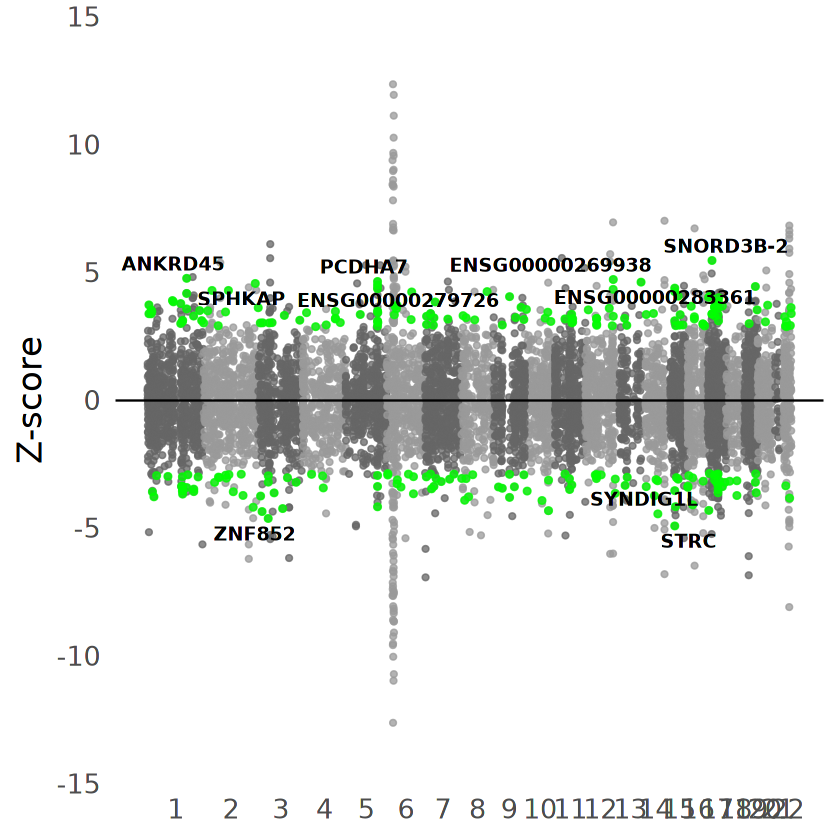

In [17]:
df2 = merge(caudate_only['FILE'], twas_dat, by='FILE')
df2 = df2[order(df2$FDR), ]

manhplot3 <- (ggplot(twas_dat, aes(x=BPcum, y=TWAS.Z)) + 
              geom_point(aes(color=as.factor(CHR_TWAS)), alpha=0.75, size=1.25) +
              #geom_point(data=twas_dat[twas_dat$FDR < 0.05 & twas_dat$P<5e-8, ], alpha=0.75, color="red") +
              #geom_point(data=df, color="blue", alpha=0.75) +
              geom_point(data=df2, color="green", alpha=0.75) +
              scale_color_manual(values = rep(c("grey40","grey60"), nCHR)) + 
              scale_x_continuous(label = axis.set$CHR_TWAS, breaks = axis.set$center) + 
              scale_y_continuous(expand = c(0,0), limits = c(-15, 15)) + labs(x = NULL, y = "Z-score") + 
              geom_hline(yintercept = 0, color = "black", linetype = "solid") + 
              ggrepel::geom_text_repel(data=head(df2, 10), fontface = "bold", #hjust=1, vjust=1,
                                       #position=position_jitter(width=1, height=1), 
                                       aes(x=BPcum, y=TWAS.Z, label=New_ID)) +
              theme_minimal(base_size=20) + 
              theme(legend.position="none", panel.border=element_blank(), 
                    panel.grid.major=element_blank(),panel.grid.minor=element_blank())
            )
manhplot3

### No labels

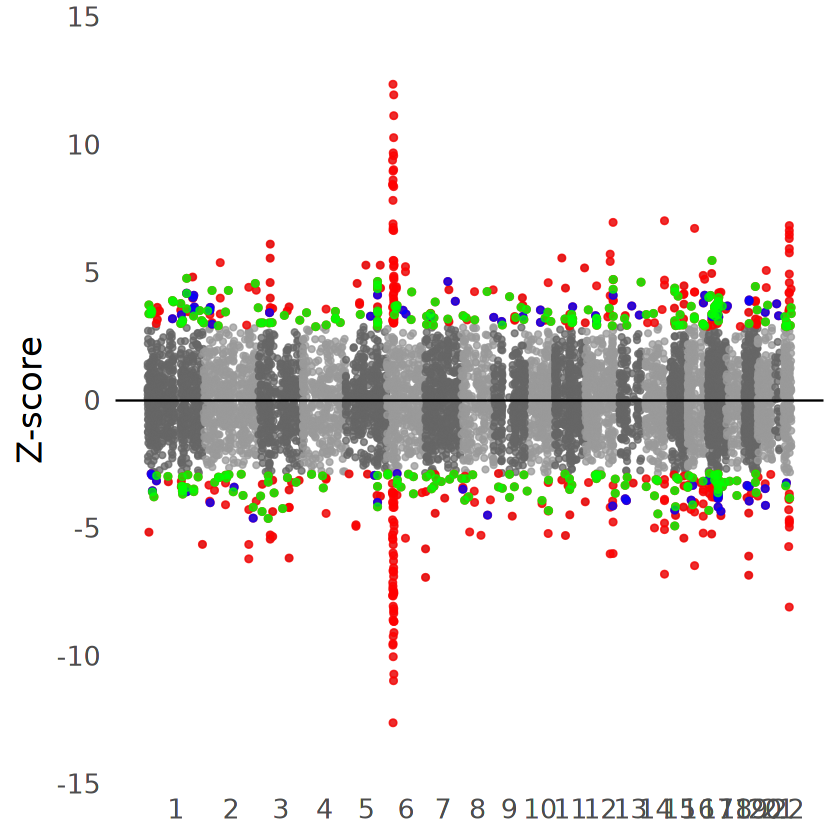

In [18]:
manhplot0 <- (ggplot(twas_dat, aes(x=BPcum, y=TWAS.Z)) + 
              geom_point(aes(color=as.factor(CHR_TWAS)), alpha=0.75, size=1.25) +
              geom_point(data=twas_dat[twas_dat$FDR < 0.05, ], color="red", alpha=0.75) +
              geom_point(data=df, color="blue", alpha=0.75) +
              geom_point(data=df2, color="green", alpha=0.75) +
              scale_color_manual(values = rep(c("grey40","grey60"), nCHR)) + 
              scale_x_continuous(label = axis.set$CHR_TWAS, breaks = axis.set$center) + 
              scale_y_continuous(expand = c(0,0), limits = c(-15, 15)) + labs(x = NULL, y = "Z-score") + 
              geom_hline(yintercept = 0, color = "black", linetype = "solid") + 
              #geom_text(data=subset(twas_dat, FDR < 0.05), hjust=-0.2, aes(x=BPcum, y=TWAS.Z, label=ID)) +
              theme_minimal(base_size=20) + 
              theme(legend.position="none", panel.border=element_blank(), 
                    panel.grid.major=element_blank(),panel.grid.minor=element_blank())
            )
manhplot0

## Save plots

In [19]:
save_plots(manhplot0, 'noLabel_twas_manhattanplot')
save_plots(manhplot1, 'topSig_twas_manhattanplot')
save_plots(manhplot2, 'sharedTop_twas_manhattanplot')
save_plots(manhplot3, 'caudateTop_twas_manhattanplot')